Following the tutorial at https://www.youtube.com/watch?v=cO5g5qLrLSo

# 0. Install Dependencies

In [2]:
# install required system dependencies
apt-get install -y xvfb x11-utils

# install required python dependencies (might need to install additional gym extras depending)
pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

SyntaxError: invalid syntax (<ipython-input-2-637b7a40a36f>, line 2)

In [14]:
#!pip install tensorflow==2.2.0
#!pip install gym
#!pip install keras
#!pip install keras-rl2

  Using cached tensorflow-2.2.0-cp37-cp37m-win_amd64.whl (459.2 MB)
  Using cached scipy-1.4.1-cp37-cp37m-win_amd64.whl (30.9 MB)
  Using cached tensorboard-2.2.2-py3-none-any.whl (3.0 MB)
  Using cached tensorflow_estimator-2.2.0-py2.py3-none-any.whl (454 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.0
    Uninstalling scipy-1.6.0:
      Successfully uninstalled scipy-1.6.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\mclea\\anaconda3\\envs\\gputest\\lib\\site-packages\\~cipy\\linalg\\cython_blas.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached keras_rl2-1.0.4-py3-none-any.whl (53 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.4.1 requires numpy~=1.19.2, but you have numpy 1.18.5 which is incompatible.
tensorflow-gpu 2.4.1 requires tensorflow-estimator<2.5.0,>=2.4.0, but you have tensorflow-estimator 2.3.0 which is incompatible.


# Test Random Environment with OpenAIGym

In [1]:
import gym
import random
import matplotlib.pyplot as plt

In [2]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
env = gym.make('CartPole-v0')
states = env.observation_space.shape[0]
actions = env.action_space.n

In [4]:
actions

2

Stopped


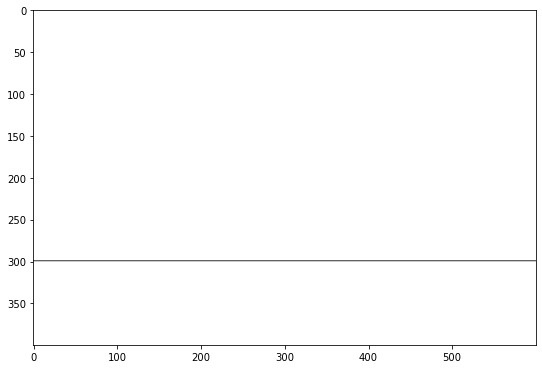

In [5]:
env.reset()
plt.figure(figsize=(9,9))
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)
env.close()
print("Stopped")

# 2. Create a Deep Learning Model with Keras

In [20]:
import numpy as np
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [21]:
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1, states)))
    model.add(Dense(23, activation='relu'))
    model.add(Dense(23, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    model.__len__=actions
    return model

In [22]:
model = build_model(states, actions)

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 23)                115       
_________________________________________________________________
dense_4 (Dense)              (None, 23)                552       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 48        
Total params: 715
Trainable params: 715
Non-trainable params: 0
_________________________________________________________________


# 3. Build Agent with Keras-RL

In [24]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [25]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [26]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=["mae"])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)


C:\Users\mclea\anaconda3\envs\gputest\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


    1/10000 [..............................] - ETA: 1:26:24 - reward: 1.0000

C:\Users\mclea\anaconda3\envs\gputest\lib\site-packages\rl\memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 88s 9ms/step - reward: 1.0000
100 episodes - episode_reward: 99.280 [8.000, 200.000] - loss: 4.334 - mae: 19.244 - mean_q: 38.815

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 84s 8ms/step - reward: 1.0000
50 episodes - episode_reward: 199.840 [195.000, 200.000] - loss: 12.027 - mae: 43.314 - mean_q: 87.252

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 87s 9ms/step - reward: 1.0000
50 episodes - episode_reward: 199.320 [184.000, 200.000] - loss: 12.210 - mae: 50.146 - mean_q: 100.481

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 95s 10ms/step - reward: 1.0000
50 episodes - episode_reward: 199.660 [189.000, 200.000] - loss: 9.031 - mae: 48.130 - mean_q: 96.100

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 91s 9ms/step - reward: 1.0000
done, took 444.958 seconds


In [27]:
dqn.test(env, nb_episodes=100, visualize=False)

Testing for 100 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
Episode 21: reward: 200.000, steps: 200
Episode 22: reward: 200.000, steps: 200
Episode 23: reward: 200.000, steps: 200
Episode 24: reward: 200.000, steps: 200
Episode 25: reward: 

In [36]:
dqn.test(env, nb_episodes=1, visualize=True)

Testing for 1 episodes ...
Episode 1: reward: 200.000, steps: 200
